CHAO TANG

# Practical 7 - Part 1A
The aim of part 1A is to calculate the homography that best maps two sets of points to one another.  We will (eventually) use this for creating panoramas, and for calculating the 3D pose of planes.  You should use this
template for your code and fill in the missing sections marked "TO DO"


# Import libraries 

In [3]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Define a set of 2D points, then apply a homography to them

In [4]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])

# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])
# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))

# Add a small amount of noise
noiseLevel = 4.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)

# Plot the first (original) and  second (after applying the homography) set of points 

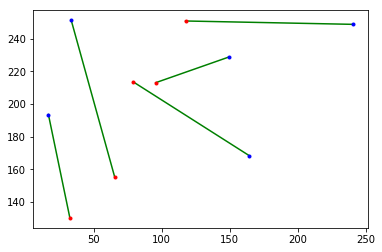

In [5]:
# Plot a green line between pairs of actual points (red) and estimated points (magenta)
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

## Comment:
This figure is the initial condition of the points pair.Because we have added moise to the pts2Cart,which is generated by the given homography matrix H and pts1Cart.so the length and the direction of those green lines vary a little everytime.

Now our goal is to estimate the homography that maps the first points to the second set of points.

# ****TO DO****: Fill in the details of these routines (solveAXEqualsZero and calcBestHomography). 

In [6]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0   
    U,L,VT = np.linalg.svd(A)
    VRow,Vcol = VT.shape
    h = VT[VRow -1,:]
    return h

In [7]:
# This function should apply the direct linear transform (DLT) algorithm to calculate the best 
# homography that maps the points in pts1Cart to their corresonding matching in pts2Cart
def calcBestHomography(pts1Cart, pts2Cart):    
    # TO DO: replace this
    # H = 
    
    # TO DO: 
    # First convert points into homogeneous representation
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    
    # Then construct the matrix A, size (2 * n_points,9)
    n_point, = pts1Cart[0,:].shape
    A = np.zeros((2 * n_point,9))
    
    for cpoint in range(n_point):
        currentVec1 = pts1Hom[:,cpoint]
        currentVec2 = pts2Hom[:,cpoint]
        
        A[2 * cpoint,:] = [0,0,0,-currentVec1[0],-currentVec1[1],-1,currentVec1[0]*currentVec2[1],currentVec1[1]*currentVec2[1],currentVec2[1]]
        A[2 * cpoint+1,:] = [currentVec1[0],currentVec1[1],1,0,0,0,-currentVec2[0]*currentVec1[0],-currentVec2[0]*currentVec1[1],-currentVec2[0]]
    
    # Solve Ah = 0
    h = solveAXEqualsZero(A)
    # Reshape h into the matrix H, values of h go first into rows of H
    H = np.reshape(h,(3,3))
    return H

Once you have completed the two routines above, we will see how well they work by applying the mapping and measuring the square distance between the desired and actual positions

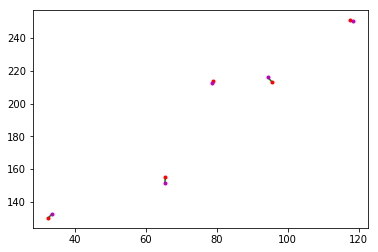

In [8]:
# TO DO: Fill in the details of this function from above 
HEst = calcBestHomography(pts1Cart,pts2Cart)

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

## figure comment:
The above figure shows that how close the reference point2 and the estimate point2.If the purple dots land on the red dots,that means our estimateH is identical to the H given. However, because we introduce noise to the mapping and the optimization process is non-linear as well, it has the oppotunity to have one pair of points that has long distance(mapping not perfect every time,it may randomly fail)

# Other things **** TO DO ****

1: Convince yourself that the homography is ambiguous up to scale (by
multiplying it by a constant factor and showing it does the same thing).
Can you see why this is the case mathematically?

2: Show empirically that your homography routine can map any four points exactly to any
other four points

## Comment:
1.
(1) When doing homography, [lambda*x,lambda*y,lambda].T = h @ [u,v,1].T. If we wanna change the homography coordinates back to the cart coordinates, x and y are divided by lambda. If we add a scalar k to h, the x and y remains the same because the scalar cancel out [k * lambda*x,k *lambda*y,k*lambda].T = k*h @ [u,v,1] 
(2) The homography is scale ambiguous because when Calculating the the h,we actually solve a homography equation AH=0 using SVD. In homography equation, the scale will cancel out because any number times zero results in zero.In mathematics, the solutuon for S*Ah = 0 is the same as Ah=0.
2. Please see the below code and results

pts1Cart =  [[238.9255443  152.93059745 284.80086927 247.66717011]
 [ 48.52762776  94.35107917 251.45561399 284.27206851]]
pts2Cart =  [[ 68.06939046  42.6672005  141.24744158 142.2879423 ]
 [234.70995083 214.86478231 282.63155496 260.42035845]]


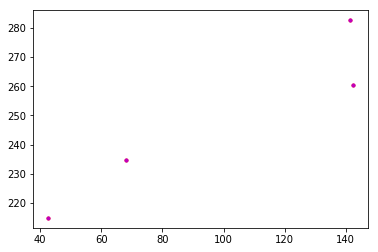

In [41]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.random.uniform(0,300,(2,4))
print('pts1Cart = ',pts1Cart)
# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])
# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))

# Add a small amount of noise
noiseLevel = 10.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)
print('pts2Cart = ',pts2Cart)
# TO DO: Fill in the details of this function from above 
HEst = calcBestHomography(pts1Cart,pts2Cart)

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

## comment:
No matter how high the noise level is , the homography can always map the randomly generated four points to another four perfectly. We can see that pts2EstCart always lie on pts2Cart.That is because the solution for h is excactly the same as the given H matrix because 4 points have 8 equations,which can perfectly solve for 8 unknowns.(The last unknown of H matrix can be a 1,h is scalar ambiguous)